In [ ]:
# Final Project
# TASK 01: PROBLEM SELECTION
# The store wants to know better the customer purchase behaviour against different products

In [1]:
# load libraries
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
# TASK 02: DATA COLLECTION
# read data from file
data = pd.read_csv('BlackFriday.csv')

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# there are 537,577 rows, and 12 columns
data.shape

(537577, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
# check for missing data
missing = data.isnull().sum().sort_values(ascending = False)
print(missing)

Product_Category_3            373299
Product_Category_2            166986
Purchase                           0
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
Product_ID                         0
User_ID                            0
dtype: int64


In [7]:
# TASK 03: DATA PREPARATION
# It seems that only 2 attributes contain missing data
# Seeing that these attributes are categorical data that describe the product,
# we believe it is safe to replace these with 0 since it being empty implies that
# those categories don't describe the product
data['Product_Category_2'] = data['Product_Category_2'].fillna(0)
data['Product_Category_3'] = data['Product_Category_3'].fillna(0)

In [8]:
# convert categorical data to numerical in order to run regressional analysis
# Create new gender column mapping Male = 1 and Female = 0
data['Gender_Num'] = np.where(data['Gender'] == 'M', 1, 0)

In [9]:
s = {
    '0-17': '0',
    '18-25': '1',
    '26-35': '2',
    '36-45': '3',
    '46-50': '4',
    '51-55': '5',
    '55+': '6'
}

data['Age_Num'] = data['Age']
data['Age_Num'] = data['Age_Num'].map(s)

In [10]:
s = {
    'A': '0',
    'B': '1',
    'C': '2'
}

data['City_Category_Num'] = data['City_Category'].map(s)

In [11]:
s = {
    '0': '0',
    '1': '1',
    '2': '2',
    '3': '3',
    '4+': '4'
}
data['Stay_In_Years_Num'] = data['Stay_In_Current_City_Years'].map(s)

In [12]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_Num,Age_Num,City_Category_Num,Stay_In_Years_Num
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,0,0,0,2
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,0,0,0,2
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,0,0,0,2
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,0,0,0,2
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,1,6,2,4


In [13]:
# as you can see, ID's are repeated on multiple lines in the data, which can affect results
# we are going to make a copy of the data by having each ID in the new table be unique, 
# while accumulating the total purchase amount in dollars. 
# In order to do this we must drop some columns, but rest assured the original data set will not be altered
aggregation_functions = {'Gender': 'first', \
                         'Age': 'first', \
                         'Occupation': 'first', \
                         'City_Category': 'first', \
                         'Stay_In_Current_City_Years': 'first', \
                         'Marital_Status': 'first',
                         'Purchase': 'sum'}

data_unique = data.groupby(data['User_ID']).aggregate(aggregation_functions)

In [14]:
data_unique.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
User_ID,,,,,,,
1000001,F,0-17,10,A,2,0,333481
1000002,M,55+,16,C,4+,0,810353
1000003,M,26-35,15,A,3,0,341635
1000004,M,46-50,7,B,2,1,205987
1000005,M,26-35,20,A,1,1,821001


In [15]:
# there are 5,891 different customers in the data set
data_unique.shape

(5891, 7)

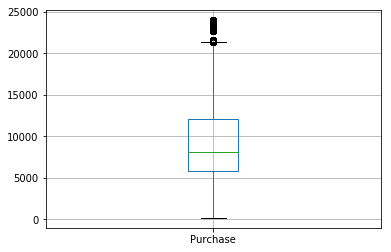

In [16]:
# Check for outliers in the purchase columns
data.boxplot(column=['Purchase'], grid=True)

In [17]:
# there seems to be a few upper outliers, but no lower outliers

(array([ 32175.,  57237., 130109., 104444.,  79179.,  24980.,  63928.,
         13437.,  29772.,   2316.]),
 array([  185. ,  2562.6,  4940.2,  7317.8,  9695.4, 12073. , 14450.6,
        16828.2, 19205.8, 21583.4, 23961. ]),
 <a list of 10 Patch objects>)

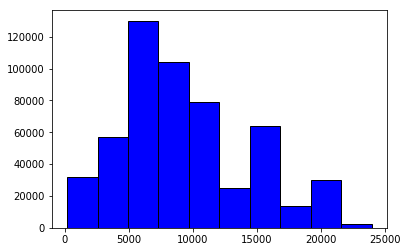

In [18]:
# TASK 04: EXPLORATORY DATA ANALYSIS
# plot a histogram of the purchase data to check for normality
plt.hist(data['Purchase'], color = 'blue', edgecolor = 'black')

In [19]:
# the histogram seems to be somewhat rightly skewed

In [20]:
# calculate descriptive statistics for each customer
cumulative = np.array(data_unique['Purchase'])
mean     = np.mean(cumulative)
stdDev   = np.std(cumulative)
median   = np.median(cumulative)
mode     = stats.mode(cumulative)
minVal   = cumulative.min()
maxVal   = cumulative.max()
rangeVal = maxVal - minVal
firstQ   = np.percentile(cumulative, 25)
thirdQ   = np.percentile(cumulative, 75)
tenthQ   = np.percentile(cumulative, 10)

In [21]:
# display the statistics calculated
print("MEAN:   " + str(mean))
print("STD:    " + str(stdDev))
print("MEDIAN: " + str(median))
print("MODE:   " + str(mode))
print("MIN:    " + str(minVal))
print("MAX:    " + str(maxVal))
print("RANGE:  " + str(rangeVal))
print("25%:    " + str(firstQ))
print("75%:    " + str(thirdQ))
print("10%:    " + str(tenthQ))

MEAN:   851751.5494822611
STD:    932918.6210067784
MEDIAN: 512612.0
MODE:   ModeResult(mode=array([92888]), count=array([2]))
MIN:    44108
MAX:    10536783
RANGE:  10492675
25%:    234914.0
75%:    1099005.0
10%:    143530.0


In [22]:
# The maximum overall total any one customer purchased was $10,536,783
# The minimum overall total any one customer purchased was $44,108
# The mean is within one standard deviation of the median, which seems to imply normality amongst customers

In [23]:
# figure out what the categories for age are
age_categories = data_unique.Age.unique()

In [24]:
age_categories

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [25]:
age_distribution = data_unique.groupby('Age').size()

In [26]:
age_distribution

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
dtype: int64

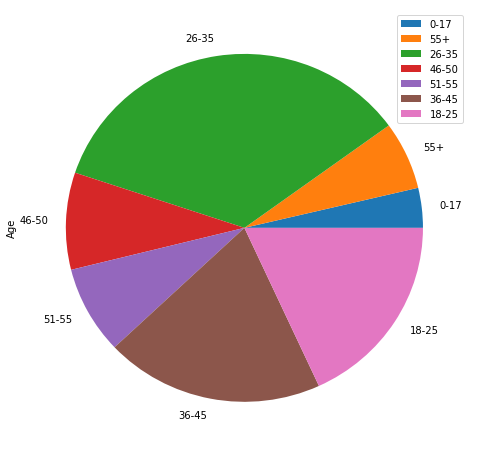

In [27]:
# pie chart displaying age of all customers
df = pd.DataFrame({'Age': age_distribution}, index=age_categories)
plot = df.plot.pie(y='Age', figsize=(8, 8))

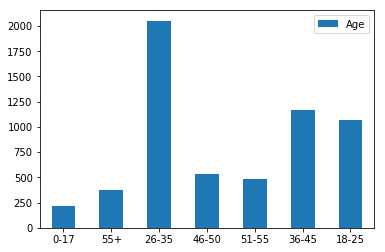

In [28]:
# bar graph displaying age of all customers
df = pd.DataFrame({'Age': age_distribution}, index=age_categories)
ax = df.plot.bar(rot=0)

In [29]:
# The highest demographic age of customers at this particular retail store is the 26-35 years range, with 2,053.
# The lowest demographic age of customers at this particular retail store is the 0-17 years range, with 218.

In [30]:
gender_distribution =  data_unique.groupby('Gender').size()

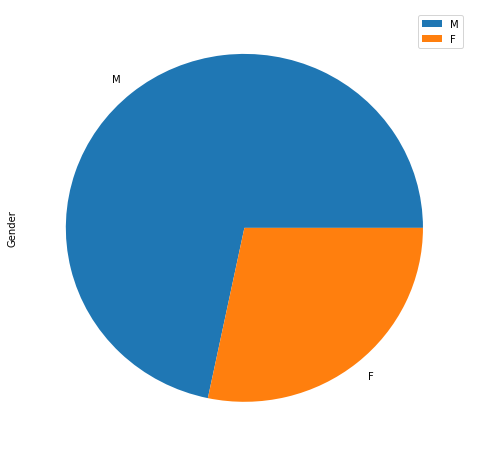

In [31]:
# pie chart displaying age of all customers
df = pd.DataFrame({'Gender': gender_distribution}, index=['M', 'F'])
plot = df.plot.pie(y='Gender', figsize=(8, 8))

In [32]:
# The data shows that the majority of the retail stores customers are men

In [33]:
# analyze the relationship between marital status and gender
male = data_unique[data_unique['Gender'] == 'M']

maleMarried = male[male['Marital_Status'] == 1]
maleNotMarried = male[male['Marital_Status'] == 0]


female = data_unique[data_unique['Gender'] == 'F']

femaleMarried = female[female['Marital_Status'] == 1]
femaleNotMarried = female[female['Marital_Status'] == 0]

<Container object of 4 artists>

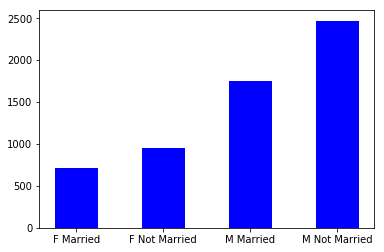

In [34]:
x = ['M Married', 'M Not Married', 'F Married', 'F Not Married']
y = [maleMarried['Gender'].count(), \
     maleNotMarried['Gender'].count(), \
     femaleMarried['Gender'].count(), \
     femaleNotMarried['Gender'].count()]
ax = plt.subplot(111)
ax.bar(x, y, width=0.5,color='b',align='center')

In [35]:
# More non-married customers of each gender frequently visit the retail store than married of that gender customers do

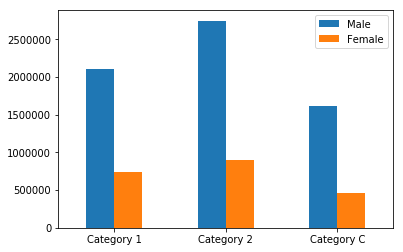

In [36]:
# Group each product category sales compared to the gender of the customer
index = ['Category 1', 'Category 2', 'Category C']

maleCat = [data[data['Gender'] == 'M']['Product_Category_1'].sum(), \
           data[data['Gender'] == 'M']['Product_Category_2'].sum(), \
           data[data['Gender'] == 'M']['Product_Category_3'].sum()]

femaleCat = [data[data['Gender'] == 'F']['Product_Category_1'].sum(), \
             data[data['Gender'] == 'F']['Product_Category_2'].sum(), \
             data[data['Gender'] == 'F']['Product_Category_3'].sum()]

df = pd.DataFrame({'Male': maleCat, 'Female': femaleCat}, index=index)
ax = df.plot.bar(rot=0)

In [37]:
# It seems that men buy much more of each product than women do

In [38]:
# Total amount of money spent on each product
# The highest selling product was P00025442 which sold $27,532,426.
# The lowest selling product was P00091742 which sold $405
products = data.groupby('Product_ID')
display_p = products['Purchase'].agg(np.sum)
display_p.sort_values(ascending = True)

Product_ID
P00091742         405
P00309042         726
P00353042        1545
P00325342        1656
P00012942        1717
P00287042        1739
P00104042        1745
P00357542        1791
P00063442        1866
P00293442        1914
P00107442        1924
P00300742        1958
P00069742        1977
P00203242        2009
P00013842        2021
P00107842        2050
P00172642        2069
P00077542        2096
P00203742        2103
P00012342        2118
P00338242        2123
P00065942        2139
P00107942        2161
P00365942        2177
P00299042        2183
P00169842        2223
P00106342        2229
P00298342        2233
P00083542        2248
P00059342        2256
               ...   
P0097242     14249873
P00120042    14254199
P00128942    14603678
P00113242    15494499
P00112442    15632165
P00242742    16065026
P00111142    16140243
P00270942    16363769
P00334242    17230484
P00044442    17441510
P00005042    17486938
P00112542    17847524
P00114942    18942450
P00052842    19492434

In [39]:
years_in_city = data_unique.Stay_In_Current_City_Years.unique()

In [40]:
#find categories for number of years staying in current city
years_in_city

array(['2', '4+', '3', '1', '0'], dtype=object)

In [41]:
current_city_distribution = data_unique.groupby('Stay_In_Current_City_Years').size()

In [42]:
current_city_distribution

Stay_In_Current_City_Years
0      772
1     2086
2     1145
3      979
4+     909
dtype: int64

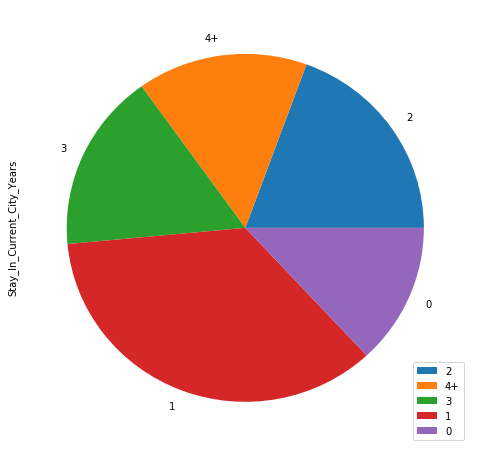

In [43]:
# pie chart displaying Stay_In_Current_City_Years of all customers
df = pd.DataFrame({'Stay_In_Current_City_Years': current_city_distribution}, index=years_in_city)
plot = df.plot.pie(y='Stay_In_Current_City_Years', figsize=(8, 8))

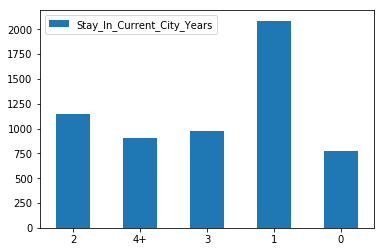

In [44]:
# bar graph displaying year stayed in the current city of all customers
df = pd.DataFrame({'Stay_In_Current_City_Years': current_city_distribution}, index=years_in_city)
ax = df.plot.bar(rot=0)

In [45]:
# The highest number of customers have lived in their current city for 1 year, with 2086.
# The lowest number of customers have lived in their current city for less than a year, with 772.

In [46]:
# sort the customers based on how long they've lived in their current city
zero = data_unique[data_unique['Stay_In_Current_City_Years'] == '0']
one = data_unique[data_unique['Stay_In_Current_City_Years'] == '1']
two = data_unique[data_unique['Stay_In_Current_City_Years'] == '2']
three = data_unique[data_unique['Stay_In_Current_City_Years'] == '3']
fourPlus = data_unique[data_unique['Stay_In_Current_City_Years'] == '4+']

<Container object of 5 artists>

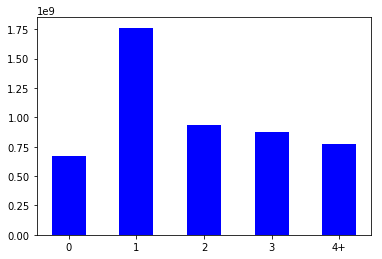

In [47]:
# calculate the total amount of purchases in dollars for each year, and graph the data
x = ['0', '1', '2', '3', '4+']
y = [zero['Purchase'].sum(), \
     one['Purchase'].sum(), \
     two['Purchase'].sum(), \
     three['Purchase'].sum(), \
     fourPlus['Purchase'].sum()]
ax = plt.subplot(111)
ax.bar(x, y, width=0.5,color='b',align='center')

In [48]:
# The data shows that residents who have lived in his/her current city for only a year spent the most.
# After living in the city for a year, residents have spent less and less each year.
# Residents who have lived in his/her city for less than a year spent the least amount of money

In [49]:
city_categories = data_unique.City_Category.unique()

In [50]:
city_categories

array(['A', 'C', 'B'], dtype=object)

In [51]:
# sort the customers based on what city category they live in
a = data_unique[data_unique['City_Category'] == 'A']
b = data_unique[data_unique['City_Category'] == 'B']
c = data_unique[data_unique['City_Category'] == 'C']

<Container object of 3 artists>

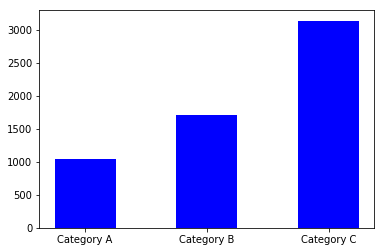

In [52]:
# calculate the total amount of residents who live in each city category
x = ['Category A', 'Category B', 'Category C']
y = [a['Gender'].count(), \
     b['Gender'].count(), \
     c['Gender'].count()]
ax = plt.subplot(111)
ax.bar(x, y, width=0.5,color='b',align='center')

In [53]:
# The most amount of customers live in city category C
# The least amount of customers live in city category A

<Container object of 3 artists>

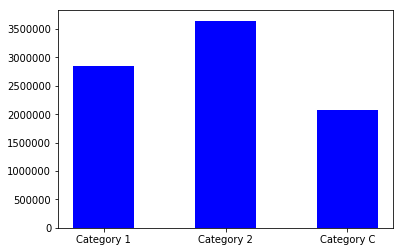

In [54]:
# calculate the total amount of sales of each product category
x = ['Category 1', 'Category 2', 'Category C']
y = [data['Product_Category_1'].sum(), \
     data['Product_Category_2'].sum(), \
     data['Product_Category_3'].sum()]
ax = plt.subplot(111)
ax.bar(x, y, width=0.5,color='b',align='center')

In [55]:
# The product category that sells the most amount of units is product category 2
# The product category that sells the least amount of units is product category 3

In [56]:
# TASK 05: DATA MODELING
# partition dataset into training, validation, and test sets using holdout method
# Response Variable: Purchase amount
X_train, X_test, Y_train, Y_test = train_test_split(data[['Gender_Num', \
                                                          'Age_Num', \
                                                          'Occupation', \
                                                          'City_Category_Num', \
                                                          'Stay_In_Years_Num', \
                                                          'Marital_Status', \
                                                          'Product_Category_1', \
                                                          'Product_Category_2', \
                                                          'Product_Category_3']], \
                                                data['Purchase'], test_size = 0.25, random_state = 0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 0)

In [57]:
# Standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [58]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_Num,Age_Num,City_Category_Num,Stay_In_Years_Num
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,0,0,0,2
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,0,0,0,2
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,0,0,0,2
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,0,0,0,2
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,1,6,2,4


In [59]:
# simple linear regression for gender predicting purchase
model = linear_model.LinearRegression().fit(X = X_train[['Gender_Num']], y = Y_train)
score_train = model.score(X = X_train[['Gender_Num']], y = Y_train) # R squared (training)
score_val = model.score(X = X_val[['Gender_Num']], y = Y_val) # R squared (validation)
score_test = model.score(X = X_test[['Gender_Num']], y = Y_test) # R squared (test)
print([score_train, score_val, score_test])

[0.0034917267707089694, 0.003529674815596184, 0.00392916092846618]


In [60]:
# simple linear regression for city category predicting purchase
model = linear_model.LinearRegression().fit(X = X_train[['City_Category_Num']], y = Y_train)
score_train = model.score(X = X_train[['City_Category_Num']], y = Y_train) # R squared (training)
score_val = model.score(X = X_val[['City_Category_Num']], y = Y_val) # R squared (validation)
score_test = model.score(X = X_test[['City_Category_Num']], y = Y_test) # R squared (test)
print([score_train, score_val, score_test])

[0.0049192498352463865, 0.004301144171112714, 0.004464388488319426]


In [61]:
# simple linear regression for marital status predicting purchase
model = linear_model.LinearRegression().fit(X = X_train[['Marital_Status']], y = Y_train)
score_train = model.score(X = X_train[['Marital_Status']], y = Y_train) # R squared (training)
score_val = model.score(X = X_val[['Marital_Status']], y = Y_val) # R squared (validation)
score_test = model.score(X = X_test[['Marital_Status']], y = Y_test) # R squared (test)
print([score_train, score_val, score_test])

[1.8972650218662679e-06, -8.631667805181209e-06, -1.2471066042518686e-05]


In [62]:
# multiple linear regression for product category 1, 2, and 3 predicting purchase
model = linear_model.LinearRegression().fit(X = X_train[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']], y = Y_train)
score_train = model.score(X = X_train[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']], y = Y_train) # R squared (training)
score_val = model.score(X = X_val[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']], y = Y_val) # R squared (validation)
score_test = model.score(X = X_test[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']], y = Y_test) # R squared (test)
print([score_train, score_val, score_test])

[0.13091403785948041, 0.13046157706840766, 0.12634023338141998]


In [63]:
# multiple linear regression for customer gender, age, and marital status predicting purchase
model = linear_model.LinearRegression().fit(X = X_train[['Gender_Num', 'Age_Num', 'Marital_Status']], y = Y_train)
score_train = model.score(X = X_train[['Gender_Num', 'Age_Num', 'Marital_Status']], y = Y_train) # R squared (training)
score_val = model.score(X = X_val[['Gender_Num', 'Age_Num', 'Marital_Status']], y = Y_val) # R squared (validation)
score_test = model.score(X = X_test[['Gender_Num', 'Age_Num', 'Marital_Status']], y = Y_test) # R squared (test)
print([score_train, score_val, score_test])

[0.0038072751307989265, 0.003979808211693303, 0.004266820585295039]


In [64]:
# multiple linear regression for customer gender, age, and city category predicting purchase
model = linear_model.LinearRegression().fit(X = X_train[['Gender_Num', 'Age_Num', 'City_Category_Num']], y = Y_train)
score_train = model.score(X = X_train[['Gender_Num', 'Age_Num', 'City_Category_Num']], y = Y_train) # R squared (training)
score_val = model.score(X = X_val[['Gender_Num', 'Age_Num', 'City_Category_Num']], y = Y_val) # R squared (validation)
score_test = model.score(X = X_test[['Gender_Num', 'Age_Num', 'City_Category_Num']], y = Y_test) # R squared (test)
print([score_train, score_val, score_test])

[0.008500290734304583, 0.008035506269598036, 0.008543080765523348]


In [65]:
# multiple linear regression for all variables predicting purchase
model = linear_model.LinearRegression().fit(X = X_train[['Gender_Num', \
                                                         'Age_Num', \
                                                         'Occupation', \
                                                         'City_Category_Num', \
                                                         'Stay_In_Years_Num', \
                                                         'Marital_Status', \
                                                         'Product_Category_1', \
                                                         'Product_Category_2', \
                                                         'Product_Category_3']], y = Y_train)
score_train = model.score(X = X_train[['Gender_Num', \
                                       'Age_Num', \
                                       'Occupation', \
                                       'City_Category_Num', \
                                       'Stay_In_Years_Num', \
                                       'Marital_Status', \
                                       'Product_Category_1', \
                                       'Product_Category_2', \
                                       'Product_Category_3']], y = Y_train) # R squared (training)
score_val = model.score(X = X_val[['Gender_Num', \
                                   'Age_Num', \
                                   'Occupation', \
                                   'City_Category_Num', \
                                   'Stay_In_Years_Num', \
                                   'Marital_Status', \
                                   'Product_Category_1', \
                                   'Product_Category_2', \
                                   'Product_Category_3']], y = Y_val) # R squared (validation)
score_test = model.score(X = X_test[['Gender_Num', \
                                   'Age_Num', \
                                   'Occupation', \
                                   'City_Category_Num', \
                                   'Stay_In_Years_Num', \
                                   'Marital_Status', \
                                   'Product_Category_1', \
                                   'Product_Category_2', \
                                   'Product_Category_3']], y = Y_test) # R squared (test)
print([score_train, score_val, score_test])

[0.136630284590452, 0.13589437917607217, 0.13190147462730284]


In [66]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_Num,Age_Num,City_Category_Num,Stay_In_Years_Num
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,0,0,0,2
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,0,0,0,2
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,0,0,0,2
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,0,0,0,2
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,1,6,2,4


In [67]:
#new holdout for classification
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(data[['Age_Num']], \
                                                data['Product_Category_1'], test_size = 0.25, random_state = 0)
X_train1, X_val1, Y_train1, Y_val1 = train_test_split(X_train1, Y_train1, test_size = 0.25, random_state = 0)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(data[['Age_Num']], \
                                                data['Product_Category_2'], test_size = 0.25, random_state = 0)
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train2, Y_train2, test_size = 0.25, random_state = 0)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(data[['Age_Num']], \
                                                data['Product_Category_3'], test_size = 0.25, random_state = 0)
X_train3, X_val3, Y_train3, Y_val3 = train_test_split(X_train3, Y_train3, test_size = 0.25, random_state = 0)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
classifier1 = LogisticRegression() 
classifier1.fit(X_train1, Y_train1)
# predict class labels using logistic regression classifier
y_pred1 = classifier1.predict(X_test1)
conf_matrix = metrics.confusion_matrix(Y_test1, y_pred1)
print(conf_matrix)

[[    0     0     0     0 33192     0     0  1051     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0  5686     0     0   202     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0  4924     0     0   112     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0  2807     0     0    87     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0 35975     0     0  1323     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0  4781     0     0   223     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0   920     0     0    29     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0 26484     0     0  1514     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0    89     0     0     2     0     0     0     0
      0     0     0   

In [69]:
accuracy = metrics.accuracy_score(Y_test1, y_pred1)
error = 1 - metrics.accuracy_score(Y_test1, y_pred1)
precision = metrics.precision_score(Y_test1, y_pred1, average = None)
recall = metrics.recall_score(Y_test1, y_pred1, average = None)
F1_score = metrics.f1_score(Y_test1, y_pred1, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.2789463893746047, 0.7210536106253953, array([0.        , 0.        , 0.        , 0.        , 0.27842057,
       0.        , 0.        , 0.29205247, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ]), array([0.        , 0.        , 0.        , 0.        , 0.96452893,
       0.        , 0.        , 0.05407529, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ]), array([0.        , 0.        , 0.        , 0.        , 0.43210877,
       0.        , 0.        , 0.09125429, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])]


/Users/vanijais/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vanijais/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
classifier1 = LogisticRegression() 
classifier1.fit(X_train2, Y_train2)
# predict class labels using logistic regression classifier
y_pred2 = classifier1.predict(X_test2)
conf_matrix = metrics.confusion_matrix(Y_test2, y_pred2)
print(conf_matrix)

[[41942     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [11927     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [  710     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [ 6448     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [ 6544     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [ 4049     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [  165     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [15784     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [ 1353     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   

In [83]:
accuracy = metrics.accuracy_score(Y_test2, y_pred2)
error = 1 - metrics.accuracy_score(Y_test2, y_pred2)
precision = metrics.precision_score(Y_test2, y_pred2, average = None)
recall = metrics.recall_score(Y_test2, y_pred2, average = None)
F1_score = metrics.f1_score(Y_test2, y_pred2, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.31208006250232523, 0.6879199374976748, array([0.31208006, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.]), array([0.47570277, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])]


/Users/vanijais/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vanijais/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
classifier1 = LogisticRegression() 
classifier1.fit(X_train3, Y_train3)
# predict class labels using logistic regression classifier
y_pred3 = classifier1.predict(X_test3)
conf_matrix = metrics.confusion_matrix(Y_test3, y_pred3)
print(conf_matrix)

[[93504     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [  151     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [  454     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [ 4089     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [ 1178     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [ 3065     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [ 2851     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [  401     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [  434     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [ 2293     0     0     0     0     0     0     0     0     0     0     0
      0     0    

In [85]:
accuracy = metrics.accuracy_score(Y_test3, y_pred3)
error = 1 - metrics.accuracy_score(Y_test3, y_pred3)
precision = metrics.precision_score(Y_test3, y_pred3, average = None)
recall = metrics.recall_score(Y_test3, y_pred3, average = None)
F1_score = metrics.f1_score(Y_test3, y_pred3, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.6957401689050932, 0.30425983109490684, array([0.69574017, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0.82057403, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])]


/Users/vanijais/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vanijais/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [86]:
#decision tree
classifier2 = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier2.fit(X_train1, Y_train1)
# predict class labels using logistic regression classifier
y_pred1 = classifier2.predict(X_test1)
conf_matrix = metrics.confusion_matrix(Y_test1, y_pred1)
print(conf_matrix)

[[    0     0     0     0 33192     0     0  1051     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0  5686     0     0   202     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0  4924     0     0   112     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0  2807     0     0    87     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0 35975     0     0  1323     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0  4781     0     0   223     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0   920     0     0    29     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0 26484     0     0  1514     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0    89     0     0     2     0     0     0     0
      0     0     0   

In [87]:
accuracy = metrics.accuracy_score(Y_test1, y_pred1)
error = 1 - metrics.accuracy_score(Y_test1, y_pred1)
precision = metrics.precision_score(Y_test1, y_pred1, average = None)
recall = metrics.recall_score(Y_test1, y_pred1, average = None)
F1_score = metrics.f1_score(Y_test1, y_pred1, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.2789463893746047, 0.7210536106253953, array([0.        , 0.        , 0.        , 0.        , 0.27842057,
       0.        , 0.        , 0.29205247, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ]), array([0.        , 0.        , 0.        , 0.        , 0.96452893,
       0.        , 0.        , 0.05407529, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ]), array([0.        , 0.        , 0.        , 0.        , 0.43210877,
       0.        , 0.        , 0.09125429, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])]


/Users/vanijais/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vanijais/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [88]:
classifier2 = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier2.fit(X_train2, Y_train2)
# predict class labels using logistic regression classifier
y_pred2 = classifier2.predict(X_test2)
conf_matrix = metrics.confusion_matrix(Y_test2, y_pred2)
print(conf_matrix)

[[41942     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [11927     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [  710     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [ 6448     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [ 6544     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [ 4049     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [  165     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [15784     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [ 1353     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   

In [89]:
accuracy = metrics.accuracy_score(Y_test2, y_pred2)
error = 1 - metrics.accuracy_score(Y_test2, y_pred2)
precision = metrics.precision_score(Y_test2, y_pred2, average = None)
recall = metrics.recall_score(Y_test2, y_pred2, average = None)
F1_score = metrics.f1_score(Y_test2, y_pred2, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.31208006250232523, 0.6879199374976748, array([0.31208006, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.]), array([0.47570277, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])]


/Users/vanijais/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vanijais/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [90]:
classifier2 = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier2.fit(X_train3, Y_train3)
# predict class labels using logistic regression classifier
y_pred3 = classifier2.predict(X_test3)
conf_matrix = metrics.confusion_matrix(Y_test3, y_pred3)
print(conf_matrix)

[[93504     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [  151     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [  454     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [ 4089     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [ 1178     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [ 3065     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [ 2851     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [  401     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [  434     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [ 2293     0     0     0     0     0     0     0     0     0     0     0
      0     0    

In [91]:
accuracy = metrics.accuracy_score(Y_test3, y_pred3)
error = 1 - metrics.accuracy_score(Y_test3, y_pred3)
precision = metrics.precision_score(Y_test3, y_pred3, average = None)
recall = metrics.recall_score(Y_test3, y_pred3, average = None)
F1_score = metrics.f1_score(Y_test3, y_pred3, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.6957401689050932, 0.30425983109490684, array([0.69574017, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0.82057403, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])]


/Users/vanijais/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vanijais/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [80]:
classifier3 =  GaussianNB()
classifier3.fit(X_train1, Y_train1)
# predict class labels using logistic regression classifier
y_pred1 = classifier3.predict(X_test1)
conf_matrix = metrics.confusion_matrix(Y_test1, y_pred1)
print(conf_matrix)

[[    0     0     0     0 30993     0     0  3250     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0  5256     0     0   632     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0  4695     0     0   341     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0  2651     0     0   243     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0 33521     0     0  3777     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0  4418     0     0   586     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0   860     0     0    89     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0 24191     0     0  3807     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0    81     0     0    10     0     0     0     0
      0     0     0   

In [92]:
accuracy = metrics.accuracy_score(Y_test1, y_pred1)
error = 1 - metrics.accuracy_score(Y_test1, y_pred1)
precision = metrics.precision_score(Y_test1, y_pred1, average = None)
recall = metrics.recall_score(Y_test1, y_pred1, average = None)
F1_score = metrics.f1_score(Y_test1, y_pred1, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.2789463893746047, 0.7210536106253953, array([0.        , 0.        , 0.        , 0.        , 0.27842057,
       0.        , 0.        , 0.29205247, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ]), array([0.        , 0.        , 0.        , 0.        , 0.96452893,
       0.        , 0.        , 0.05407529, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ]), array([0.        , 0.        , 0.        , 0.        , 0.43210877,
       0.        , 0.        , 0.09125429, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])]


/Users/vanijais/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vanijais/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [93]:
classifier3 =  GaussianNB()
classifier3.fit(X_train2, Y_train2)
# predict class labels using logistic regression classifier
y_pred2 = classifier3.predict(X_test2)
conf_matrix = metrics.confusion_matrix(Y_test2, y_pred2)
print(conf_matrix)

[[41942     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [11927     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [  710     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [ 6448     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [ 6544     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [ 4049     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [  165     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [15784     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [ 1353     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   

In [94]:
accuracy = metrics.accuracy_score(Y_test2, y_pred2)
error = 1 - metrics.accuracy_score(Y_test2, y_pred2)
precision = metrics.precision_score(Y_test2, y_pred2, average = None)
recall = metrics.recall_score(Y_test2, y_pred2, average = None)
F1_score = metrics.f1_score(Y_test2, y_pred2, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.31208006250232523, 0.6879199374976748, array([0.31208006, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.]), array([0.47570277, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])]


/Users/vanijais/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vanijais/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [95]:
classifier3 =  GaussianNB()
classifier3.fit(X_train3, Y_train3)
# predict class labels using logistic regression classifier
y_pred3 = classifier3.predict(X_test3)
conf_matrix = metrics.confusion_matrix(Y_test3, y_pred3)
print(conf_matrix)

[[93504     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [  151     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [  454     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [ 4089     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [ 1178     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [ 3065     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [ 2851     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [  401     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [  434     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [ 2293     0     0     0     0     0     0     0     0     0     0     0
      0     0    

In [96]:
accuracy = metrics.accuracy_score(Y_test3, y_pred3)
error = 1 - metrics.accuracy_score(Y_test3, y_pred3)
precision = metrics.precision_score(Y_test3, y_pred3, average = None)
recall = metrics.recall_score(Y_test3, y_pred3, average = None)
F1_score = metrics.f1_score(Y_test3, y_pred3, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.6957401689050932, 0.30425983109490684, array([0.69574017, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0.82057403, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])]


/Users/vanijais/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vanijais/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
